Drive slow mode by applying phase space perturbation in bulk velocity $\delta_1 U_\parallel$

AstroGK result
Setting
- $A_\parallel = 0$
- $\beta_p = 0.01$
- $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_upar_1'
data_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_upar_decay'
i = '1a'
filename_bpar = data_dir + '/lin_upar_{0:s}.bpar'.format(str(i))
filename_phi = data_dir + '/lin_upar_{0:s}.phi'.format(str(i))

dtype_bpar = {'names': ('f1', 't', 'f2', 'bpar2', 'f3', 'f4', 'h1', 'h2'),
              'formats': ('S2', 'f4', 'S10', 'f4', 'S10', 'S10', 'f4', 'f4')}
dtype_phi = {'names': ('f1', 't', 'f2', 'phi2', 'f3', 'f4', 'h1', 'h2'),
              'formats': ('S2', 'f4', 'S10', 'f4', 'S10', 'S10', 'f4', 'f4')}
data_bpar = np.loadtxt(filename_bpar, dtype = dtype_bpar)
data_phi = np.loadtxt(filename_phi, dtype = dtype_bpar)

In [3]:
def readColumn(data, column):
    return np.array([elem[column] for elem in data])

bpar = np.sqrt(readColumn(data_bpar, 3))
t_bpar = readColumn(data_bpar, 1)
phi = np.sqrt(readColumn(data_phi, 3))
t_phi = readColumn(data_phi, 1)

In [6]:
ti_te = 1
kperp_rhoi = 0.2
wbar_0 = 0.2
bi = 0.01
upar0 = 10
mi_me = 1836

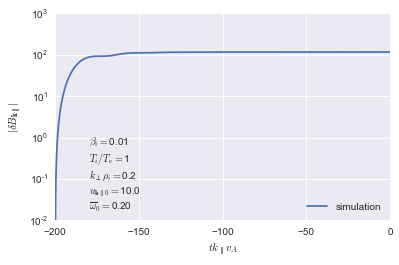

In [7]:
dt_label='0.01'
texts = "{0}{1}\n".format(r'$\beta_i=$',bi) + \
    "{0}{1}\n".format(r'$T_i/T_e=$',ti_te) + \
    "{0}{1:.1f}\n".format(r'$k_\perp \rho_i=$',kperp_rhoi) + \
    "{0}{1:.1f}\n".format(r'$u_{\mathbf{k}\parallel 0}=$', upar0) +\
    "{0}{1:.2f}\n".format(r'$\overline{\omega}_0=$',wbar_0)

fig_bpar = plt.figure(figsize=[6, 6*0.618])
plt.plot((t_bpar-20) * 10, bpar * np.sqrt(8) * 10, label = 'simulation')
# plt.plot(tbar_arr * np.sqrt(bi), bpar_arr * bpar0 * 100, label = 'analytic' + r'$\times$ 100')
# plt.xlabel('$tk_\parallel v_{ti}$')
plt.xlabel('$tk_\parallel v_A$')
plt.ylabel('$|\delta B_{\mathbf{k}\parallel}|$')
plt.legend(loc='lower right')
plt.yscale('log')
# plt.xlim([0, 500])
ax = plt.gca()
plt.text(0.1, 0., texts, transform=ax.transAxes)

fit the initial decay to obtain dispersion relation

In [ ]:
# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,5.1])
# Initial guess.
x0    = np.array([0.0, 0.0, 0.0])
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])
def func(x, a, b, c):
    return a + b*x + c*x*x

import scipy.optimize as optimization

print(optimization.curve_fit(func, xdata, ydata, x0, sigma))

In [ ]:
t0 = 20
def func(t, w, g, A, off, phi):
    return (off + A*np.cos(w*t+phi))*np.exp(-g*t)

In [ ]:
import scipy.optimize as optimization

n = 500
xdata = (t_bpar-t0)[:n]/np.sqrt(bi)
ydata = bpar[:n] * np.sqrt(8) * 10
sigma= np.ones(n)
x0 = np.array([0.2, -0.2, 1, 100, 1])
print(optimization.curve_fit(func, xdata, ydata, x0, sigma))

In [ ]:
# func(t, w, g, A, off, phi)
n = 1000
xdata = (t_bpar-t0)[:n]/np.sqrt(bi)
ydata = bpar[:n] * np.sqrt(8) * 10
x0 = np.array([0.23, 0.06, 30, 100, -1.5])
plt.plot(xdata, ydata)
plt.plot(xdata, [func(x, *x0) for x in xdata])
plt.yscale('log')

In [ ]:
fig_phi = plt.figure(figsize=[6, 6*0.618])
plt.plot(t_phi, phi, label = 'simulation')
# plt.plot(tbar_arr * np.sqrt(bi), phi_arr*bpar0, label = 'analytic')
plt.xlabel('$tk_\parallel v_{ti}$')
plt.ylabel('$|\phi_{\mathbf{k}}|$')
plt.legend(loc='lower right')
ax = plt.gca()
plt.text(0.1, 0, texts, transform=ax.transAxes)
plt.yscale('log')
# plt.xlim([0, 20])